# **&nbsp;TRABAJO FINAL DEL BOOTCAMP IV BIG DATA & MACHINE LEARNING**

                                           Alumno  Francisco Javier Gonzálvez Chico
                                           Título  Recomendador de Precios para Anfitriones de AirBNB España


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**CUADERNO DE TRABAJO 04**
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Modelos Machine Learning para Clasificación. Selección del Modelo y Portabilidad.**

En los notebooks se codificarán las celdas con las que se procesarán las acciones sobre el dataset de trabajo y las ejecuciones de los modelos.
No se comentarán ya que toda la documentación del trabajo se presentará en un documento Word en el que irá incluido este notebook.

 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_trn = pd.read_csv('./train_def.csv', sep = ';', decimal = '.')
data_tst = pd.read_csv('./test_def.csv', sep = ';', decimal = '.')

In [3]:
from sklearn.preprocessing import StandardScaler

values_trn = data_trn.values
values_tst = data_tst.values

feature_names = data_trn.columns[0:-4]

X_trn = values_trn[:, 0:-4]
y_trn = values_trn[:, -4:-3]

X_tst = values_tst[:, 0:-4]
y_tst = values_tst[:, -4:-3]

scaler = StandardScaler().fit(X_trn)

X_trn_Sc = scaler.transform(X_trn)
X_tst_Sc = scaler.transform(X_tst)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

max_depth_GBC = [2, 3, 4]
n_estimators_GBC = [500, 1000, 1500]
learning_rate_GBC = [0.5, 0.1]

for i in max_depth_GBC:
    for j in n_estimators_GBC:
        for k in learning_rate_GBC:
            gbC = GradientBoostingClassifier(random_state = 0, max_depth = i, n_estimators = j, learning_rate = k)
            gbC.fit(X_trn_Sc, y_trn)

            y_trn_gbC = gbC.predict(X_trn_Sc)
            y_tst_gbC = gbC.predict(X_tst_Sc)

            med_ep = np.mean(np.absolute(y_tst_gbC - y_tst))*50

            print(f"\n max_depth {i} | n_estimators {j} | learning_rate {k}\n+" + '-'*51 + "+")
            print(f"| MSE Train = {mean_squared_error(y_trn, y_trn_gbC):.6f}       " +
                  f"Score Train R\u00b2 = {gbC.score(X_trn_Sc, y_trn):.3f} |")
            print(f"| MSE Test  = {mean_squared_error(y_tst, y_tst_gbC):.6f}       " +
                  f"Score Test  R\u00b2 = {gbC.score(X_tst_Sc, y_tst):.3f} |")
            print(f"|\t  Error Medio Predicción: {med_ep:.2f}€\t    |\n+" + '-'*51 + "+")


 max_depth 2 | n_estimators 500 | learning_rate 0.5
+---------------------------------------------------+
| MSE Train = 1.443364       Score Train R² = 0.672 |
| MSE Test  = 1.449756       Score Test  R² = 0.673 |
|	  Error Medio Predicción: 55.16€	    |
+---------------------------------------------------+

 max_depth 2 | n_estimators 500 | learning_rate 0.1
+---------------------------------------------------+
| MSE Train = 1.033624       Score Train R² = 0.716 |
| MSE Test  = 1.192520       Score Test  R² = 0.700 |
|	  Error Medio Predicción: 52.80€	    |
+---------------------------------------------------+

 max_depth 2 | n_estimators 1000 | learning_rate 0.5
+---------------------------------------------------+
| MSE Train = 1.443364       Score Train R² = 0.672 |
| MSE Test  = 1.449756       Score Test  R² = 0.673 |
|	  Error Medio Predicción: 55.16€	    |
+---------------------------------------------------+

 max_depth 2 | n_estimators 1000 | learning_rate 0.1
+--------------

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

gbC_nn = GradientBoostingClassifier(random_state = 0, max_depth = 3,
                                    n_estimators = 500, learning_rate = 0.1)
gbC_nn.fit(X_trn, y_trn)

y_trn_gbC_nn = gbC_nn.predict(X_trn)
y_tst_gbC_nn = gbC_nn.predict(X_tst)

med_ep = np.mean(np.absolute(y_tst_gbC_nn - y_tst))*50

print(f"\n max_depth 3 | n_estimators 500 | learning_rate 0.1\n+" + '-'*51 + "+")
print(f"| MSE Train = {mean_squared_error(y_trn, y_trn_gbC_nn):.6f}       " +
      f"Score Train R\u00b2 = {gbC_nn.score(X_trn, y_trn):.3f} |")
print(f"| MSE Test  = {mean_squared_error(y_tst, y_tst_gbC_nn):.6f}       " +
      f"Score Test  R\u00b2 = {gbC_nn.score(X_tst, y_tst):.3f} |")
print(f"|\t  Error Medio Predicción: {med_ep:.2f}€\t    |\n+" + '-'*51 + "+")


 max_depth 3 | n_estimators 500 | learning_rate 0.1
+---------------------------------------------------+
| MSE Train = 0.632344       Score Train R² = 0.767 |
| MSE Test  = 1.052033       Score Test  R² = 0.705 |
|	  Error Medio Predicción: 54.58€	    |
+---------------------------------------------------+


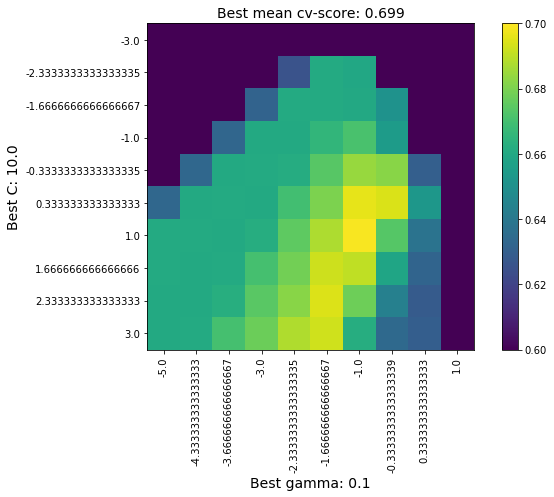

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_SVM = np.logspace(-3, 3, 10)
gamma_SVM = np.logspace(-5, 1, 10)

parameters_SVM = {'C': C_SVM, 'gamma': gamma_SVM}

gs_svc = GridSearchCV(SVC(kernel = 'rbf', random_state = 0), scoring = 'accuracy',
                      param_grid = parameters_SVM, cv = 5)
gs_svc.fit(X_trn_Sc, y_trn)

scores = gs_svc.cv_results_['mean_test_score'].reshape(len(C_SVM), len(gamma_SVM))

plt.figure(figsize = (10, 6))
plt.imshow(scores, interpolation = 'nearest', vmin = 0.6, vmax = 0.7)
plt.xlabel(f"Best gamma: {gs_svc.best_params_['gamma']}", fontsize = 14)
plt.ylabel(f"Best C: {gs_svc.best_params_['C']}", fontsize = 14)
plt.colorbar()
plt.xticks(np.arange(len(gamma_SVM)), np.log10(gamma_SVM), rotation = 90)
plt.yticks(np.arange(len(C_SVM)), np.log10(C_SVM))
plt.title(f"Best mean cv-score: {gs_svc.best_score_:.3f}", fontsize = 14)
plt.show()

In [49]:
C_svmC = [10., 2.1544]
gamma_svmC = [0.1, 0.4642]

for i in gamma_svmC:
    for j in C_svmC:
        svmC = SVC(kernel = 'rbf', gamma = i, C = j,
                   probability = True, random_state = 0)
        svmC.fit(X_trn_Sc, y_trn)

        y_trn_svmC = svmC.predict(X_trn_Sc)
        y_tst_svmC = svmC.predict(X_tst_Sc)

        med_ep = np.mean(np.absolute(y_tst_svmC - y_tst))*50

        print(f"\n\t    gamma: {i}  |  " + 
              f"C: {j}\n"+ '-'*49)
        print(f" MSE Train = {mean_squared_error(y_trn, y_trn_svmC):.6f}\t" +
              f"Score Train R\u00b2 = {svmC.score(X_trn_Sc, y_trn):.3f}")
        print(f" MSE Test  = {mean_squared_error(y_tst, y_tst_svmC):.6f}\t" +
              f"Score Test  R\u00b2 = {svmC.score(X_tst_Sc, y_tst):.3f}")
        print(f"\t  Error Medio Predicción: {med_ep:.2f}€")


	    gamma: 0.1  |  C: 10.0
-------------------------------------------------
 MSE Train = 0.518529	Score Train R² = 0.797
 MSE Test  = 1.102114	Score Test  R² = 0.696
	  Error Medio Predicción: 53.98€

	    gamma: 0.1  |  C: 2.1544
-------------------------------------------------
 MSE Train = 0.768791	Score Train R² = 0.750
 MSE Test  = 1.102114	Score Test  R² = 0.697
	  Error Medio Predicción: 52.43€

	    gamma: 0.4642  |  C: 10.0
-------------------------------------------------
 MSE Train = 0.196609	Score Train R² = 0.925
 MSE Test  = 1.292683	Score Test  R² = 0.671
	  Error Medio Predicción: 53.84€

	    gamma: 0.4642  |  C: 2.1544
-------------------------------------------------
 MSE Train = 0.368741	Score Train R² = 0.868
 MSE Test  = 1.272520	Score Test  R² = 0.695
	  Error Medio Predicción: 51.87€


In [51]:
!pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [53]:
import xgboost as xgb

max_depth_XGBC = [3, 4]
n_estimators_XGBC = range(200, 1100, 100)

for i in max_depth_XGBC:
    for j in n_estimators_XGBC:
        xgbC = xgb.XGBClassifier(random_state = 0, max_depth = i, n_estimators = j, learning_rate = 0.1)
        xgbC.fit(X_trn_Sc, y_trn)
        
        y_trn_xgbC = xgbC.predict(X_trn_Sc)
        y_tst_xgbC = xgbC.predict(X_tst_Sc)

        med_ep = np.mean(np.absolute(y_tst_xgbC - y_tst))*50

        print(f"\n max_depth {i} | n_estimators {j} | learning_rate 0.1\n+" + '-'*51 + "+")
        print(f"| MSE Train = {mean_squared_error(y_trn, y_trn_xgbC):.6f}       " +
              f"Score Train R\u00b2 = {xgbC.score(X_trn_Sc, y_trn):.3f} |")
        print(f"| MSE Test  = {mean_squared_error(y_tst, y_tst_xgbC):.6f}       " +
              f"Score Test  R\u00b2 = {xgbC.score(X_tst_Sc, y_tst):.3f} |")
        print(f"|\t  Error Medio Predicción: {med_ep:.2f}€\t    |\n+" + '-'*51 + "+")


 max_depth 3 | n_estimators 200 | learning_rate 0.1
+---------------------------------------------------+
| MSE Train = 0.849922       Score Train R² = 0.722 |
| MSE Test  = 1.077724       Score Test  R² = 0.701 |
|	  Error Medio Predicción: 52.44€	    |
+---------------------------------------------------+

 max_depth 3 | n_estimators 300 | learning_rate 0.1
+---------------------------------------------------+
| MSE Train = 0.757837       Score Train R² = 0.731 |
| MSE Test  = 1.087805       Score Test  R² = 0.701 |
|	  Error Medio Predicción: 52.77€	    |
+---------------------------------------------------+

 max_depth 3 | n_estimators 400 | learning_rate 0.1
+---------------------------------------------------+
| MSE Train = 0.704834       Score Train R² = 0.741 |
| MSE Test  = 1.066667       Score Test  R² = 0.704 |
|	  Error Medio Predicción: 52.92€	    |
+---------------------------------------------------+

 max_depth 3 | n_estimators 500 | learning_rate 0.1
+----------------

In [8]:
xgbC_nn = xgb.XGBClassifier(random_state = 0, max_depth = 4,
                            n_estimators = 600, learning_rate = 0.1)
xgbC_nn.fit(X_trn, y_trn)

y_trn_xgbC_nn = xgbC_nn.predict(X_trn)
y_tst_xgbC_nn = xgbC_nn.predict(X_tst)

med_ep = np.mean(np.absolute(y_tst_xgbC_nn - y_tst))*50

print(f"\n max_depth 4 | n_estimators 600 | learning_rate 0.1\n+" + '-'*51 + "+")
print(f"| MSE Train = {mean_squared_error(y_trn, y_trn_xgbC_nn):.6f}       " +
      f"Score Train R\u00b2 = {xgbC_nn.score(X_trn, y_trn):.3f} |")
print(f"| MSE Test  = {mean_squared_error(y_tst, y_tst_xgbC_nn):.6f}       " +
      f"Score Test  R\u00b2 = {xgbC_nn.score(X_tst, y_tst):.3f} |")
print(f"|\t  Error Medio Predicción: {med_ep:.2f}€\t    |\n+" + '-'*51 + "+")


 max_depth 4 | n_estimators 600 | learning_rate 0.1
+---------------------------------------------------+
| MSE Train = 0.408945       Score Train R² = 0.799 |
| MSE Test  = 0.981789       Score Test  R² = 0.716 |
|	  Error Medio Predicción: 54.18€	    |
+---------------------------------------------------+


In [13]:
def plot_importance_coefs(importances, data, feature_names, algorithm):
    importances /= np.max(importances)
    indices = np.argsort(importances)[::-1]
    
    my_colors = [(x/(len(importances)), x/(2*len(importances)),
                  .4) for x in range(len(importances))]
    
    plt.figure(figsize = (8, 5))
    
    plt.bar(range(data.shape[1]), importances[indices],
            label = algorithm, color = my_colors)
    plt.xticks(range(data.shape[1]), feature_names[indices],
               rotation = 90, fontsize = 14)
    plt.legend(loc = 1, fontsize = 16)
    
    plt.show()

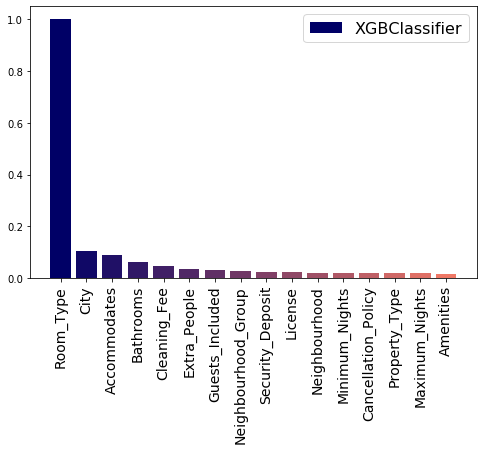

In [7]:
plot_importance_coefs(xgbC.feature_importances_, X_trn_Sc, feature_names,
                      'XGBClassifier')

In [16]:
y_predict = xgbC_nn.predict(X_tst)

error_prediccion_xgbC_nn = np.absolute(y_predict - y_tst)
med_ep = np.mean(error_prediccion_xgbC_nn)

print(f"La media de error prediciendo del Modelo XGBoostClassifier es {med_ep:.2f} clases")

La media de error prediciendo del Modelo XGBoostClassifier es 1.08 clases


In [9]:
from sklearn.externals import joblib

joblib.dump(xgbC_nn, './modelo_XGBC.pkl')

['./modelo_XGBC.pkl']

In [17]:
from sklearn.externals import joblib

xgbC_portable = joblib.load('./modelo_XGBC.pkl')

y_predict = xgbC_portable.predict(X_tst[[0]])

print(f"La clase del registro 0 de test es {y_tst[0]} y la predicción del modelo es {y_predict}")

La clase del registro 0 de test es [1.] y la predicción del modelo es [1.]
